Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

### Servicios de Interconnect

Interconnect proporciona principalmente dos tipos de servicios:

1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, *línea de abonado digital*) o a través de un cable de fibra óptica.

Algunos otros servicios que ofrece la empresa incluyen:

- Seguridad en Internet: software antivirus (*ProtecciónDeDispositivo*) y un bloqueador de sitios web maliciosos (*SeguridadEnLínea*).
- Una línea de soporte técnico (*SoporteTécnico*).
- Almacenamiento de archivos en la nube y backup de datos (*BackupOnline*).
- Streaming de TV (*StreamingTV*) y directorio de películas (*StreamingPelículas*)

La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.

### Descripción de los datos

Los datos consisten en archivos obtenidos de diferentes fuentes:

- `contract.csv` — información del contrato;
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

En cada archivo, la columna `customerID` (ID de cliente) contiene un código único asignado a cada cliente. La información del contrato es válida a partir del 1 de febrero de 2020.

<ul>
            <li>Como objetivo se tiene que crear un modelo que permita predecir correctamente cuando un cliente tienda a dejar la compañia, por lo tanto es un problema de clasificación, se tiene que lograr en la metrica AUC-ROC >= .088.</li>
        </ul> 

<ol>
  <li><b>Revision de los datos</b></li>
        <ul>
            <li>Se realizará la revisión de los archivos .csv y se verificara el estado de los datos, para verificar su composición y todo el banco de    cada uno de los datasets para poder proceder con la limpieza de los datos en caso de requerirse. </li>
        </ul> 
  <li><b>Limpieza de los datos</b></li>
           <ul>
            <li>En este paso se realizará la limpieza de los valores ausentes, duplicados y se analizará en busca de datos fuera de lo común.   </li>
        </ul> 
  <li><b>Preparacion de datos y unificacion de datos  </b></li>
          <ul>
            <li> Se realizará el agrupamiento de los datasets por medio de "CostumerID", revisando si existen datos a procesar. También se podrá visualizar por medio de gráficos algunos datos para poder entender mas a detalle el comportamiento.   </li>
        </ul> 
  <li><b>Analisis Exploratorio de Datos (EDA)</b></li>
        <ul>
            <li>Ya con los datos revisados y limpios, podemos categorizar , y así mismo tambien tratar columnas con datos relevantes como "EndDate" la cual nos enfocaremos, así mismo estandarizar. </li>
        </ul> 
        
  <li><b>Entrenamiento de Modelos y pruebas  </b></li>
          <ul>
            <li>Se realizará el entranemiento de diversos modelos como son Random Forest, XGBoost, LightGBM, y estos se conpararan con una regresion logística la cual utilizaremos de referencia para poder comparar la efectividad de cada uno de los modelos, asi mismo, lo mas conveniente sería hacer una hiperparametrizacion utilizando GridSearchCV para poder aumentar la eficiencia de los modelos.  </li>
        </ul> 
  <li><b>Conclusiones</b></li>
            <ul>
            <li>Ya obteniendo los valores mas adecuados con metricas AUC-ROC y accurancy ("Exactitud") del modelo mas adecuado se podrá hacer un informe con todo el proceso y los resultados obtenidos</li>
        </ul>
</ol>

 * Recomiendo realizar una validación cruzada extensa para asegurar la robustez del modelo.
 * Sería útil incluir un análisis de correlación para identificar posibles relaciones entre las variables que no se han considerado.
 * Podrías explorar técnicas de reducción de dimensionalidad, como PCA, para ver si mejoran el rendimiento del modelo.
 * No olvides revisar si hay sobreajuste.
 * Si haces One-Hot Encoding, utiliza  `drop_first=True`, lo cual es excelente para evitar la multicolinealidad.


# 1. Revision de Datos 

## 1.1 Carga de Librerias y DataFrame 

In [2]:
# importar librerias 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

from datetime import date
from datetime import datetime
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from collections import Counter

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from boruta import BorutaPy
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
#from lightgbm import early_stopping, log_evaluation
from sklearn.dummy import DummyClassifier


In [3]:
contract=pd.read_csv(r'C:\Users\Ricardo Peñaloza\Downloads\datasets\final_provider\contract.csv')#'contract.csv')
internet=pd.read_csv(r'C:\Users\Ricardo Peñaloza\Downloads\datasets\final_provider\internet.csv')#'internet.csv')
personal=pd.read_csv(r'C:\Users\Ricardo Peñaloza\Downloads\datasets\final_provider\personal.csv')#'personal.csv')
phone=pd.read_csv(r'C:\Users\Ricardo Peñaloza\Downloads\datasets\final_provider\phone.csv')#'phone.csv')

## 1.2 Revisión y Exploración de Datos 

Se procede con  la revisión y exploracion de los datos 

In [4]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [5]:
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [6]:
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [7]:
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [8]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [9]:
contract.describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [10]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [11]:
internet.describe()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


In [12]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [13]:
personal.describe()

,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [14]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [15]:
phone.describe()

,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


# 2. Limpieza de Datos

Se cambia el nombre de las columnas por formato Snake Case

In [16]:
def snake_case(text):
    text = re.sub(r'[\s\-]+', '_', text)
    text = re.sub(r'([a-z0-9])([A-Z])', r'\1_\2', text)
    text = re.sub(r'__+', '_', text)
    text = text.strip('_').lower()
    return text


In [17]:

contract.columns=[snake_case(col) for col in contract.columns]
internet.columns=[snake_case(col) for col in internet.columns]
personal.columns=[snake_case(col) for col in personal.columns]
phone.columns=[snake_case(col) for col in phone.columns]

Se cambiarán algunos tipos de datos como object a date en el caso de fechas o float 

## 2.1 Contract

In [18]:
contract.head(5)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [19]:
contract['begin_date']=pd.to_datetime(contract['begin_date'])

In [20]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 440.3+ KB


In [21]:

contract['total_charges']=pd.to_numeric(contract['total_charges'],errors='coerce')


In [22]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7032 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 440.3+ KB


In [23]:
contract.isnull().sum()

customer_id           0
begin_date            0
end_date              0
type                  0
paperless_billing     0
payment_method        0
monthly_charges       0
total_charges        11
dtype: int64

Hay cargos totales nulos

In [24]:
contract[contract['total_charges'].isnull()]

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,NaN
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,NaN
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,NaN
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,NaN
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,NaN
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,NaN
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,NaN
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,NaN
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,NaN


In [25]:
contract[contract['begin_date']=='2020-02-01']

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,NaN
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,NaN
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,NaN
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,NaN
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,NaN
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,NaN
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,NaN
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,NaN
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,NaN


Ya que la informacion del contrato es a partir del 1 de Febrero de 2020, lo que tienen estos clientes en comun es la fecha, por lo tanto se puede deducir que como no se ha pasado el cargo se replicaran los cargos mensuales en los cargos totales. 

In [26]:
contract['total_charges'].fillna(contract['monthly_charges'],inplace=True)

In [27]:
contract.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [28]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 440.3+ KB


YA NO EXISTEN VALORES NULOS EN LOS CARGOS, PROCEDEMOS A VERIFICAR EL OBJETIVO :'end_date'

In [29]:
contract['end_date']

0                        No
1                        No
2       2019-12-01 00:00:00
3                        No
4       2019-11-01 00:00:00
               ...         
7038                     No
7039                     No
7040                     No
7041    2019-11-01 00:00:00
7042                     No
Name: end_date, Length: 7043, dtype: object

In [30]:
contract[contract['end_date']=='No']

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.90
...,...,...,...,...,...,...,...,...
7037,2569-WGERO,2014-02-01,No,Two year,Yes,Bank transfer (automatic),21.15,1419.40
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.50
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.90
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45


In [31]:
contract['end_date'].value_counts()

No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: end_date, dtype: int64

Ya que se tiene que hacer una clasificacion, se puede segmentar el fin de contratos con 0 y 1 en , en una nueva columna para no perder datos de fechas y duración, que nos podrían ayudar con el análisis.

In [32]:
contract['cancelled']= contract['end_date'].apply(lambda i:0 if i=='No' else 1)
contract

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,cancelled
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [33]:
contract['end_date'].value_counts()

No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: end_date, dtype: int64

In [34]:
contract['end_date']=pd.to_datetime(contract['end_date'],errors='coerce')

In [35]:
contract['end_date'].value_counts()

2019-11-01    485
2019-12-01    466
2020-01-01    460
2019-10-01    458
Name: end_date, dtype: int64

In [36]:
contract.isnull().sum()

customer_id             0
begin_date              0
end_date             5174
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
cancelled               0
dtype: int64

In [37]:
contract.select_dtypes(include='object').columns

Index(['customer_id', 'type', 'paperless_billing', 'payment_method'], dtype='object')

In [38]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1869 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   cancelled          7043 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 495.3+ KB


Por el momento dejaremos los datos de end_date de esta forma, para poder hacer el analisis mas adelante , ya que los datos nulos pertenecen a los usuarios que no hay cancelado

## 2.2 Internet

In [39]:
internet.head(5)

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [40]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        5517 non-null   object
 1   internet_service   5517 non-null   object
 2   online_security    5517 non-null   object
 3   online_backup      5517 non-null   object
 4   device_protection  5517 non-null   object
 5   tech_support       5517 non-null   object
 6   streaming_tv       5517 non-null   object
 7   streaming_movies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [41]:
internet.duplicated().sum()

0

In [42]:
internet.isnull().sum()

customer_id          0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
dtype: int64

No hay duplicados ni nulos 

## 2.3 Personal

In [43]:
personal

,customer_id,gender,senior_citizen,partner,dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [44]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 non-null   object
 2   senior_citizen  7043 non-null   int64 
 3   partner         7043 non-null   object
 4   dependents      7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [45]:
personal.duplicated().sum()

0

In [46]:
personal.isnull().sum()

customer_id       0
gender            0
senior_citizen    0
partner           0
dependents        0
dtype: int64

NO HAY DUPLICADOS NI NULOS

## 2.4 Phone

In [47]:
phone

,customer_id,multiple_lines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


In [48]:
phone.isnull().sum()

customer_id       0
multiple_lines    0
dtype: int64

In [49]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     6361 non-null   object
 1   multiple_lines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [50]:
phone.duplicated().sum()

0

No hay datos duplicados ni nulos, sin embargo podemos preprocesar los datos desde este momento, ya que podemos deducir que multiple lines  tienen servicio de telefono, en dado caso que tenga valor de yes se puede deducir tambien que cuentan con 2 o mas lineas, haremos 3 columnas bajo estos argumentos, ademas que al momento de unir los dataframe, habra sesgo de datos por la cantidad de usuarios que solo tienen uno u otro servicio  

In [51]:
phone['phone']=1

In [52]:
phone

,customer_id,multiple_lines,phone
0,5575-GNVDE,No,1
1,3668-QPYBK,No,1
2,9237-HQITU,No,1
3,9305-CDSKC,Yes,1
4,1452-KIOVK,Yes,1
...,...,...,...
6356,2569-WGERO,No,1
6357,6840-RESVB,Yes,1
6358,2234-XADUH,Yes,1
6359,8361-LTMKD,Yes,1


In [53]:
phone['extra_services'] = np.where(phone['multiple_lines'] == 'Yes', 1, 0)
phone

,customer_id,multiple_lines,phone,extra_services
0,5575-GNVDE,No,1,0
1,3668-QPYBK,No,1,0
2,9237-HQITU,No,1,0
3,9305-CDSKC,Yes,1,1
4,1452-KIOVK,Yes,1,1
...,...,...,...,...
6356,2569-WGERO,No,1,0
6357,6840-RESVB,Yes,1,1
6358,2234-XADUH,Yes,1,1
6359,8361-LTMKD,Yes,1,1


# 3. Preparacion y Agrupamiento de Datos

In [54]:
df=pd.merge(contract,personal, on='customer_id', how='inner')
df=pd.merge(df,internet, on='customer_id',how='left')
df=pd.merge(df,phone,on='customer_id', how='left')
df

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,cancelled,gender,...,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,phone,extra_services
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,0,Female,...,DSL,No,Yes,No,No,No,No,NaN,NaN,NaN
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,0,Male,...,DSL,Yes,No,Yes,No,No,No,No,1.0,0.0
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,Male,...,DSL,Yes,Yes,No,No,No,No,No,1.0,0.0
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,0,Male,...,DSL,Yes,No,Yes,Yes,No,No,NaN,NaN,NaN
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,Female,...,Fiber optic,No,No,No,No,No,No,No,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,NaT,One year,Yes,Mailed check,84.80,1990.50,0,Male,...,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes,1.0,1.0
7039,2234-XADUH,2014-02-01,NaT,One year,Yes,Credit card (automatic),103.20,7362.90,0,Female,...,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,1.0,1.0
7040,4801-JZAZL,2019-03-01,NaT,Month-to-month,Yes,Electronic check,29.60,346.45,0,Female,...,DSL,Yes,No,No,No,No,No,NaN,NaN,NaN
7041,8361-LTMKD,2019-07-01,2019-11-01,Month-to-month,Yes,Mailed check,74.40,306.60,1,Male,...,Fiber optic,No,No,No,No,No,No,Yes,1.0,1.0


contract, internet , phone , personal unidos por customer_id

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1869 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   cancelled          7043 non-null   int64         
 9   gender             7043 non-null   object        
 10  senior_citizen     7043 non-null   int64         
 11  partner            7043 non-null   object        
 12  dependents         7043 non-null   object        
 13  internet_service   5517 non-null   object        
 14  online_s

Podemos observar que hay nuevos valores nulos agregados, ya que los dataframes solo consideraban a los usuarios dependiendo del servicio activo.

In [56]:
df.isna().sum()

customer_id             0
begin_date              0
end_date             5174
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
cancelled               0
gender                  0
senior_citizen          0
partner                 0
dependents              0
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_tv         1526
streaming_movies     1526
multiple_lines        682
phone                 682
extra_services        682
dtype: int64

In [57]:
df['end_date'].isna().value_counts()

True     5174
False    1869
Name: end_date, dtype: int64

Ya que estan registrados las usuarios en 'cancelled', no se usara la columna ' end_date', por lo tanto mas adelante quitaremos datos irrelevantes para el entrenamiento del modelo

En el caso de internet service es necesario poner en los datos nulos algun distintivo ya  que los usuarios se dividen en DSL y Fibra ótica, en este caso se pondrá '-1' ya que no se ha contratado ese servicio y evitar conflictos mas adelante.

In [58]:
df['internet_service']

0               DSL
1               DSL
2               DSL
3               DSL
4       Fiber optic
           ...     
7038            DSL
7039    Fiber optic
7040            DSL
7041    Fiber optic
7042    Fiber optic
Name: internet_service, Length: 7043, dtype: object

In [59]:
df["internet_service"] = df["internet_service"].fillna("-1")
print(df.isnull().sum())

customer_id             0
begin_date              0
end_date             5174
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
cancelled               0
gender                  0
senior_citizen          0
partner                 0
dependents              0
internet_service        0
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_tv         1526
streaming_movies     1526
multiple_lines        682
phone                 682
extra_services        682
dtype: int64


Dado que los demas servicios de internet pertenecen a clientes que no cuentan con el servicio se rellenaran con 'No'

In [60]:
internet_col=['online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies']

In [61]:
for i in internet_col:
    df[i] = df[i].fillna('No')   
print(df.isnull().sum())

customer_id             0
begin_date              0
end_date             5174
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
cancelled               0
gender                  0
senior_citizen          0
partner                 0
dependents              0
internet_service        0
online_security         0
online_backup           0
device_protection       0
tech_support            0
streaming_tv            0
streaming_movies        0
multiple_lines        682
phone                 682
extra_services        682
dtype: int64


In [62]:
df

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,cancelled,gender,...,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,phone,extra_services
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,0,Female,...,DSL,No,Yes,No,No,No,No,NaN,NaN,NaN
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,0,Male,...,DSL,Yes,No,Yes,No,No,No,No,1.0,0.0
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,Male,...,DSL,Yes,Yes,No,No,No,No,No,1.0,0.0
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,0,Male,...,DSL,Yes,No,Yes,Yes,No,No,NaN,NaN,NaN
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,Female,...,Fiber optic,No,No,No,No,No,No,No,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,NaT,One year,Yes,Mailed check,84.80,1990.50,0,Male,...,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes,1.0,1.0
7039,2234-XADUH,2014-02-01,NaT,One year,Yes,Credit card (automatic),103.20,7362.90,0,Female,...,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,1.0,1.0
7040,4801-JZAZL,2019-03-01,NaT,Month-to-month,Yes,Electronic check,29.60,346.45,0,Female,...,DSL,Yes,No,No,No,No,No,NaN,NaN,NaN
7041,8361-LTMKD,2019-07-01,2019-11-01,Month-to-month,Yes,Mailed check,74.40,306.60,1,Male,...,Fiber optic,No,No,No,No,No,No,Yes,1.0,1.0


Como ya segmentamos en phone y extra services, la variable multiple lines , podemos elimnarla poseriormente, , si embargo estas variables ya que al igual que los servicios de internet, estos servicios agreagados no fueron contratados entonces de igual manera se rellena de 0 tanto phone como extra services

In [63]:
df['phone'].fillna(0,inplace=True)
df['extra_services'].fillna(0, inplace=True)

In [64]:
df.isna().sum()

customer_id             0
begin_date              0
end_date             5174
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
cancelled               0
gender                  0
senior_citizen          0
partner                 0
dependents              0
internet_service        0
online_security         0
online_backup           0
device_protection       0
tech_support            0
streaming_tv            0
streaming_movies        0
multiple_lines        682
phone                   0
extra_services          0
dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1869 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   cancelled          7043 non-null   int64         
 9   gender             7043 non-null   object        
 10  senior_citizen     7043 non-null   int64         
 11  partner            7043 non-null   object        
 12  dependents         7043 non-null   object        
 13  internet_service   7043 non-null   object        
 14  online_s

In [66]:
df['phone']=df['phone'].astype(int)
df['extra_services']=df['extra_services'].astype(int)

# 4. Análisis Exploratorio de Datos (EDA)

In [67]:
df.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,cancelled,gender,...,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,phone,extra_services
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,0,Female,...,DSL,No,Yes,No,No,No,No,NaN,0,0
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,0,Male,...,DSL,Yes,No,Yes,No,No,No,No,1,0
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,Male,...,DSL,Yes,Yes,No,No,No,No,No,1,0
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,0,Male,...,DSL,Yes,No,Yes,Yes,No,No,NaN,0,0
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,Female,...,Fiber optic,No,No,No,No,No,No,No,1,0


In [68]:
df['end_date'].describe()

C:\Users\Ricardo Peñaloza\AppData\Local\Temp\ipykernel_12924\631191076.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['end_date'].describe()


count                    1869
unique                      4
top       2019-11-01 00:00:00
freq                      485
first     2019-10-01 00:00:00
last      2020-01-01 00:00:00
Name: end_date, dtype: object

In [69]:
df['begin_date'].max()

Timestamp('2020-02-01 00:00:00')

para end_date en los valores nulos y para analizar las duraciones se pondrá la fecha máxima de begin_date, de esta manera podemos analizar las duraciones de los clientes tanto de los que siguen en la compañia con los que han cancelado

In [70]:
df['end_date'].fillna(df['begin_date'].max(),inplace=True)

In [71]:
df.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,cancelled,gender,...,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,phone,extra_services
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,0,Female,...,DSL,No,Yes,No,No,No,No,NaN,0,0
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,0,Male,...,DSL,Yes,No,Yes,No,No,No,No,1,0
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,Male,...,DSL,Yes,Yes,No,No,No,No,No,1,0
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,0,Male,...,DSL,Yes,No,Yes,Yes,No,No,NaN,0,0
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,Female,...,Fiber optic,No,No,No,No,No,No,No,1,0


In [72]:
df['begin_month'] = df['begin_date'].dt.month
df['begin_year'] = df['begin_date'].dt.year 
df['end_month'] = df['end_date'].dt.month
df['end_year']=df['end_date'].dt.year

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   cancelled          7043 non-null   int64         
 9   gender             7043 non-null   object        
 10  senior_citizen     7043 non-null   int64         
 11  partner            7043 non-null   object        
 12  dependents         7043 non-null   object        
 13  internet_service   7043 non-null   object        
 14  online_s

In [74]:
df.drop(columns='multiple_lines',inplace=True)

In [75]:
df.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,cancelled,gender,...,device_protection,tech_support,streaming_tv,streaming_movies,phone,extra_services,begin_month,begin_year,end_month,end_year
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,0,Female,...,No,No,No,No,0,0,1,2020,2,2020
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,0,Male,...,Yes,No,No,No,1,0,4,2017,2,2020
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,Male,...,No,No,No,No,1,0,10,2019,12,2019
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,0,Male,...,Yes,Yes,No,No,0,0,5,2016,2,2020
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,Female,...,No,No,No,No,1,0,9,2019,11,2019


In [76]:


df['service_months'] = df['end_date']
df['service_months'] = round((df['end_date'] - df['begin_date'])/np.timedelta64(1, 'M'))
df['service_months'] = df['service_months'].astype(int) 

In [77]:
df.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,cancelled,gender,...,tech_support,streaming_tv,streaming_movies,phone,extra_services,begin_month,begin_year,end_month,end_year,service_months
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,0,Female,...,No,No,No,0,0,1,2020,2,2020,1
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,0,Male,...,No,No,No,1,0,4,2017,2,2020,34
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,Male,...,No,No,No,1,0,10,2019,12,2019,2
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,0,Male,...,Yes,No,No,0,0,5,2016,2,2020,45
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,Female,...,No,No,No,1,0,9,2019,11,2019,2


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   cancelled          7043 non-null   int64         
 9   gender             7043 non-null   object        
 10  senior_citizen     7043 non-null   int64         
 11  partner            7043 non-null   object        
 12  dependents         7043 non-null   object        
 13  internet_service   7043 non-null   object        
 14  online_s

In [79]:
df['service_months'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: service_months, dtype: float64

El promedio de duracion son 32 meses lo cual significa que la mayoria tiende a durar 2 años y medio en la compañia.

In [80]:
df.groupby('begin_year')['customer_id'].count().sort_values(ascending=True)

begin_year
2013       8
2020     244
2016     763
2017     845
2015     852
2018    1030
2014    1344
2019    1957
Name: customer_id, dtype: int64

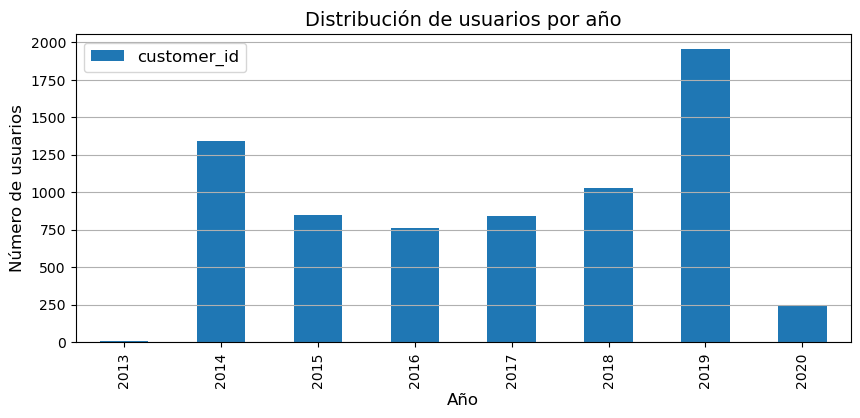

In [81]:
plot_b_y = df.groupby('begin_year')['customer_id'].count()
fig, ax = plt.subplots(figsize=(10,4))
plot_b_y.plot(kind='bar', ax=ax)

plt.title('Distribución de usuarios por año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de usuarios', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.yaxis.grid(True)
ax.legend(fontsize=12, loc='upper left')
plt.show()

In [82]:
df_end_months=df[(df['end_date']!= '2020-02-01')]

In [83]:
df_end_months['end_date'].value_counts()

2019-11-01    485
2019-12-01    466
2020-01-01    460
2019-10-01    458
Name: end_date, dtype: int64

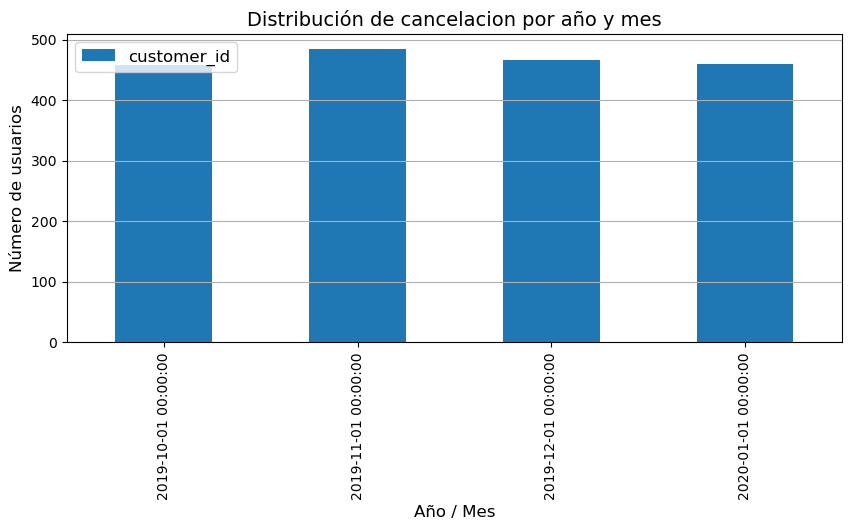

In [84]:
plot_e_y = df.groupby(df_end_months['end_date'])['customer_id'].count()
fig, ax = plt.subplots(figsize=(10,4))
plot_e_y.plot(kind='bar', ax=ax)

plt.title('Distribución de cancelacion por año y mes', fontsize=14)
plt.xlabel('Año / Mes', fontsize=12)
plt.ylabel('Número de usuarios', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.yaxis.grid(True)
ax.legend(fontsize=12, loc='upper left')
plt.show()

En las graficas se puede notar que las cancelaciones se han dado en los ultimos meses del 2019 y en el primer mes de 2020, sin embargo algo que llama la atención es que el numero de usuarios es muy similar cada mes, podemos deducir que hay algún comportamiento extraño en la compañia en esos ultimos meses.  

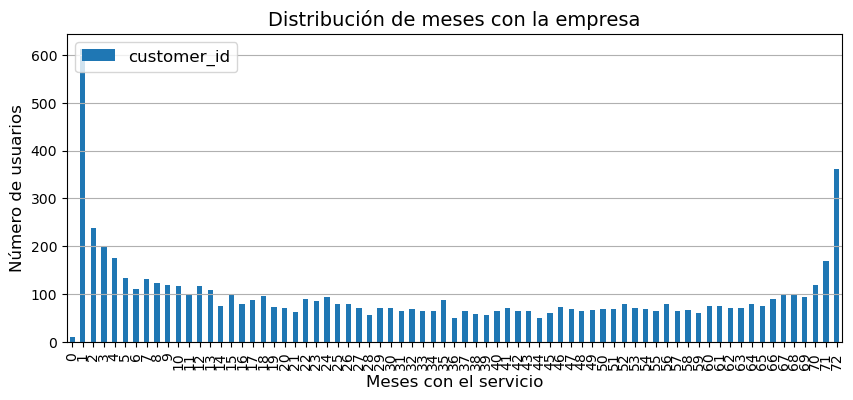

In [85]:
service_months_plt=df.groupby(['service_months'])['customer_id'].count()
fig, ax = plt.subplots(figsize=(10,4))
service_months_plt.plot(kind='bar', ax=ax)

plt.title('Distribución de meses con la empresa', fontsize=14)
plt.xlabel('Meses con el servicio', fontsize=12)
plt.ylabel('Número de usuarios', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.yaxis.grid(True)
ax.legend(fontsize=12, loc='upper left')
plt.show()

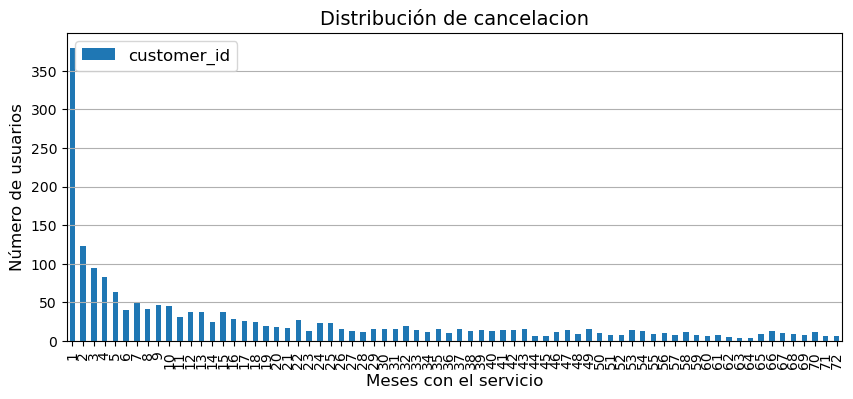

In [86]:
cancelled_diff_df=df[df['end_date']!= '2020-02-01']
cancelled_diff=cancelled_diff_df.groupby(['service_months'])['customer_id'].count()
fig, ax = plt.subplots(figsize=(10,4))
cancelled_diff.plot(kind='bar', ax=ax)

plt.title('Distribución de cancelacion', fontsize=14)
plt.xlabel('Meses con el servicio', fontsize=12)
plt.ylabel('Número de usuarios', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.yaxis.grid(True)
ax.legend(fontsize=12, loc='upper left')
plt.show()

Se puede observar que los primeros meses es cuando se cancela el servicio, como podemos ver en las graficas anteriores hay una tendencia en los primeros meses de contratación a cancelar. 

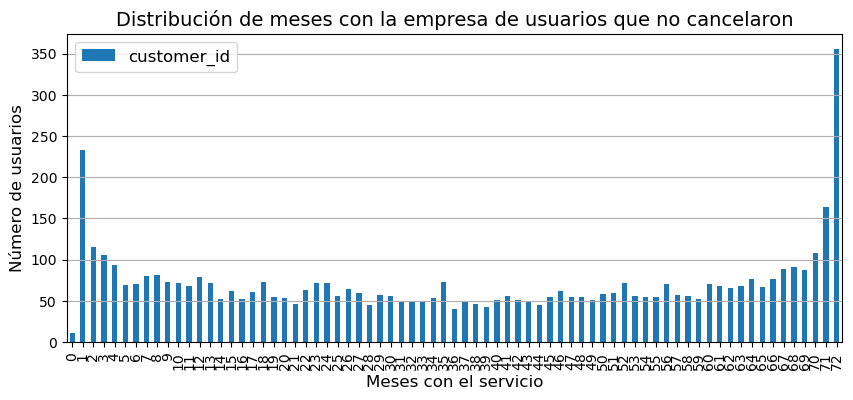

In [87]:
no_cancelled_df=df[df['end_date']== '2020-02-01']
no_cancelled=no_cancelled_df.groupby(['service_months'])['customer_id'].count()
fig, ax = plt.subplots(figsize=(10,4))
no_cancelled.plot(kind='bar', ax=ax)

plt.title('Distribución de meses con la empresa de usuarios que no cancelaron', fontsize=14)
plt.xlabel('Meses con el servicio', fontsize=12)
plt.ylabel('Número de usuarios', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax.yaxis.grid(True)
ax.legend(fontsize=12, loc='upper left')
plt.show()


Podemos observar que efectivamente hay muchos usuarios que se mantienen estables y con el servicio, muchos de ellos son nuevos, y muchos otros son mas longevos con la compañia. 

In [88]:
df.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,cancelled,gender,...,tech_support,streaming_tv,streaming_movies,phone,extra_services,begin_month,begin_year,end_month,end_year,service_months
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,0,Female,...,No,No,No,0,0,1,2020,2,2020,1
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,0,Male,...,No,No,No,1,0,4,2017,2,2020,34
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,Male,...,No,No,No,1,0,10,2019,12,2019,2
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,0,Male,...,Yes,No,No,0,0,5,2016,2,2020,45
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,Female,...,No,No,No,1,0,9,2019,11,2019,2


Se compara los cargos mensuales con las cancelaciones asi como los cargos totales

In [89]:
no_cancelled_df['monthly_charges'].describe()

count    5174.000000
mean       61.265124
std        31.092648
min        18.250000
25%        25.100000
50%        64.425000
75%        88.400000
max       118.750000
Name: monthly_charges, dtype: float64

In [90]:
cancelled_diff_df['monthly_charges'].describe()

count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: monthly_charges, dtype: float64

In [91]:
import collections
collections.Counter(no_cancelled_df['monthly_charges']).most_common(10)

[(20.05, 58),
 (19.95, 41),
 (19.7, 41),
 (19.9, 40),
 (20.0, 40),
 (19.85, 40),
 (19.65, 39),
 (19.55, 38),
 (19.8, 35),
 (20.25, 35)]

In [92]:
collections.Counter(cancelled_diff_df['monthly_charges']).most_common(10)

[(74.4, 13),
 (74.9, 9),
 (45.3, 8),
 (74.95, 8),
 (94.4, 7),
 (70.15, 7),
 (70.0, 7),
 (70.3, 7),
 (85.35, 7),
 (93.85, 7)]

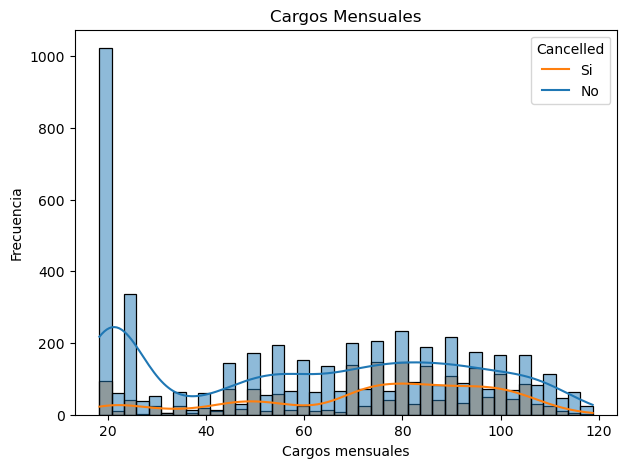

In [93]:

plt.figure(figsize=(7,5))
sns.histplot(data=df,x='monthly_charges',bins=40,hue='cancelled',kde=True,alpha=0.5)
plt.legend(title='Cancelled', labels=['Si', 'No'])
plt.xlabel('Cargos mensuales')
plt.ylabel('Frecuencia')
plt.title('Cargos Mensuales')
plt.show()


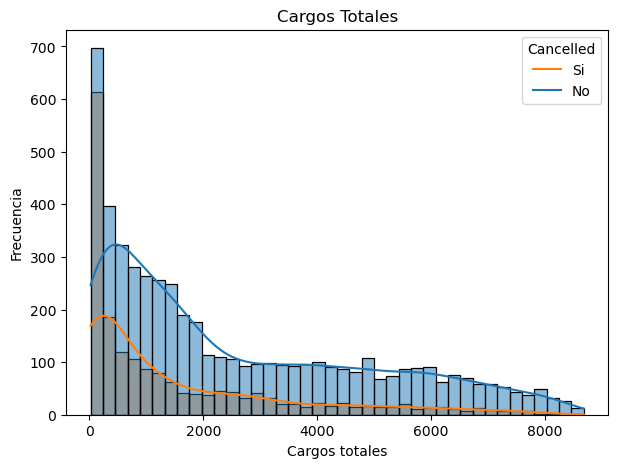

In [94]:
plt.figure(figsize=(7,5))
sns.histplot(data=df,x='total_charges',bins=40,hue='cancelled',kde=True,alpha=0.5)
plt.legend(title='Cancelled', labels=['Si', 'No'])
plt.xlabel('Cargos totales')
plt.ylabel('Frecuencia')
plt.title('Cargos Totales')
plt.show()


Logicamente ya que se ha visto que la mayoria de usuarios que ha cancelado ha sido de los ultimos meses proximos a 2020, los cargos mensuales tienen mayor peso en un rango de 70 a 90 , y puede indicar que puede ser un factor importante para la decision de cancelacion de los contratos, los cargos totales tienden al mismo comportamiento en comparacion con los cargos mensuales.
Debemos de poner atencion en los cargos extras que se le puedan estar haciendo a los usuarios.

In [95]:
df['extra'] = df['total_charges'] - df['monthly_charges'] * df['service_months']

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   cancelled          7043 non-null   int64         
 9   gender             7043 non-null   object        
 10  senior_citizen     7043 non-null   int64         
 11  partner            7043 non-null   object        
 12  dependents         7043 non-null   object        
 13  internet_service   7043 non-null   object        
 14  online_s

In [97]:
def graph_cancelled_plot(data, columns):
    contr_columns = columns

    n = len(contr_columns)
    cols = 2
    rows = (n + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
    for i, var in enumerate(contr_columns):
        ax = axes[i // cols, i % cols]
        sns.countplot(x=data[var], hue=data['cancelled'], ax=ax)
        ax.set_title(f"{var} vs cancelled")
        ax.set_xlabel(var)
        ax.set_ylabel("usuarios")
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True, linestyle="--", alpha=0.5)

    for j in range(i + 1, rows * cols):
        fig.delaxes(axes[j // cols, j % cols])
    plt.tight_layout()
    plt.show()



In [98]:
contract_cols=['type','paperless_billing','payment_method','gender','senior_citizen','partner','dependents']
internet_cols=['internet_service','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies','phone','extra_services']

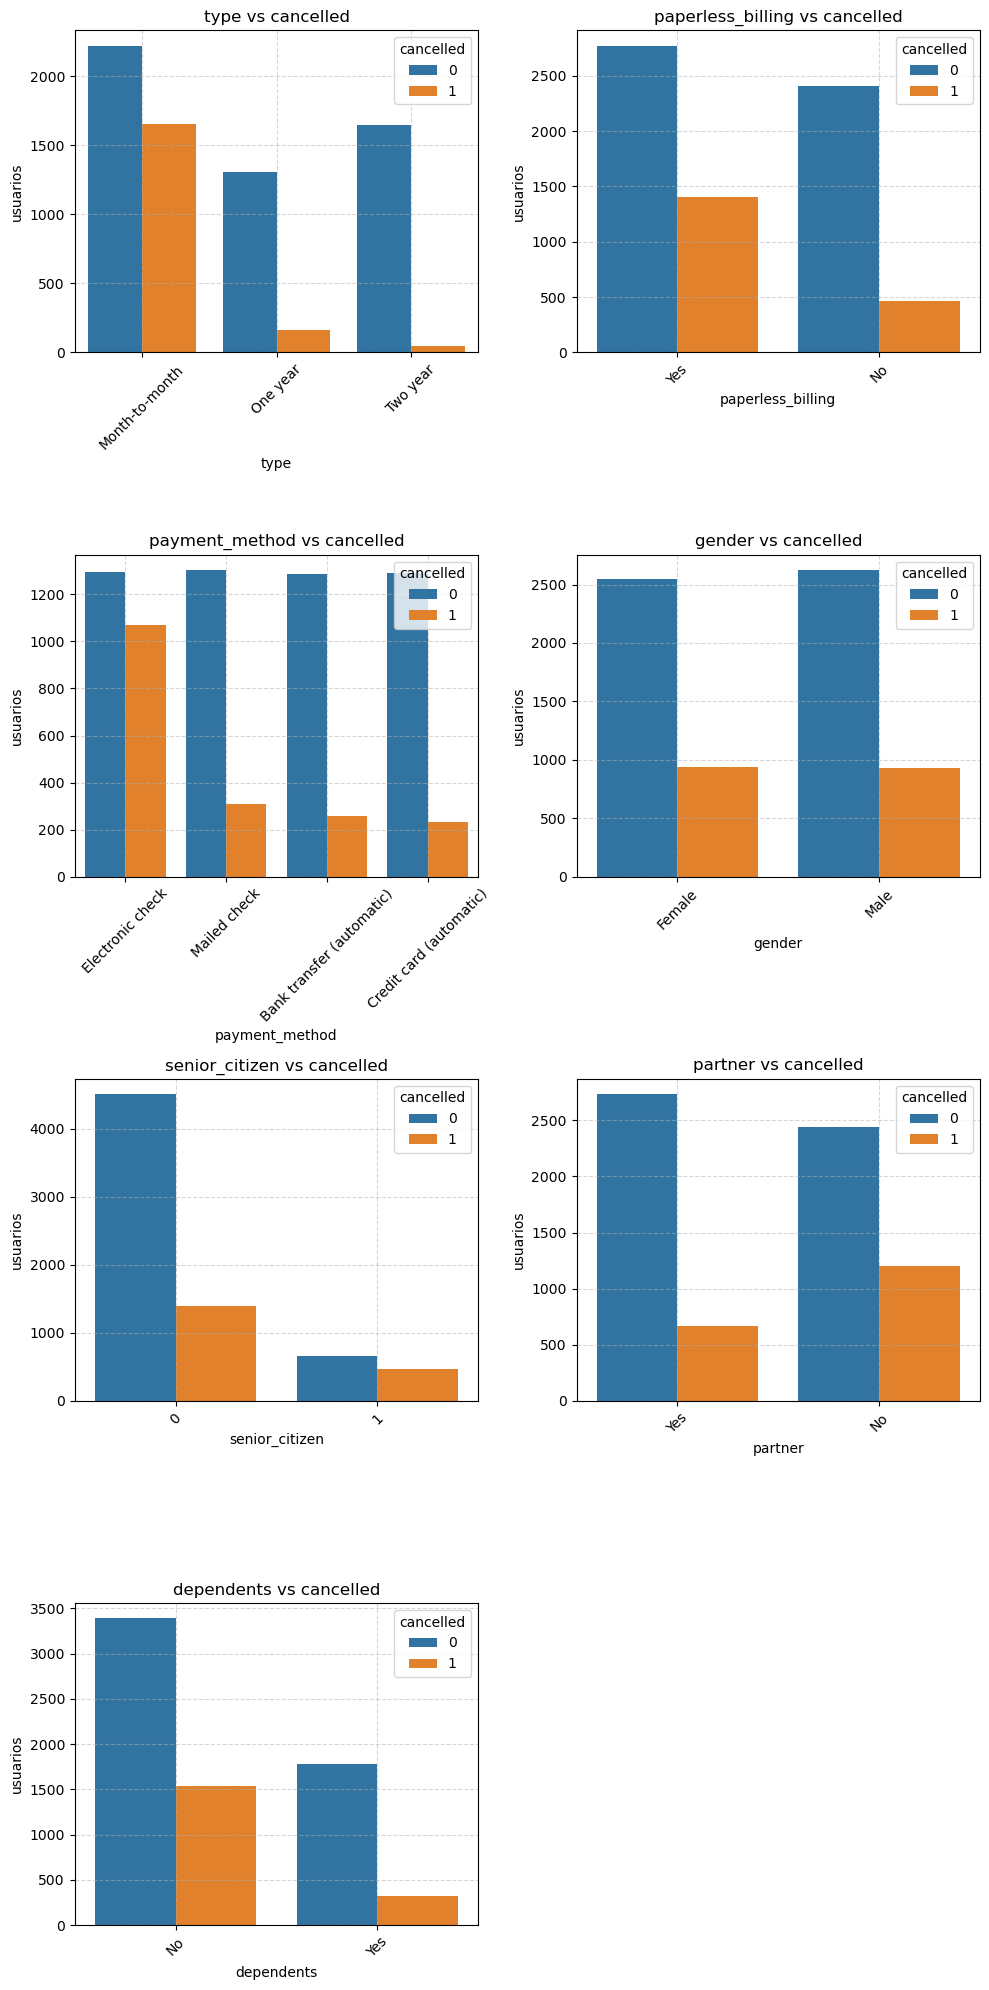

In [99]:
graph_cancelled_plot(df,contract_cols)

Analizando las graficas nos podemos dar cuenta de varias cosas en común que tienen las personas que han cancelado, se enlistan como sigue:
* Contrataron por més.
* La mayoria activaron ticket electronico y cheque electronico.
* Sobre el genero no hay mucha diferencia. 
* La mayoría no son personas de la tercera edad.
* No tienen pareja. 
* No tienen algun compromiso familiar.   

Se puede dar una idea que son personas jovenes sin familia. 

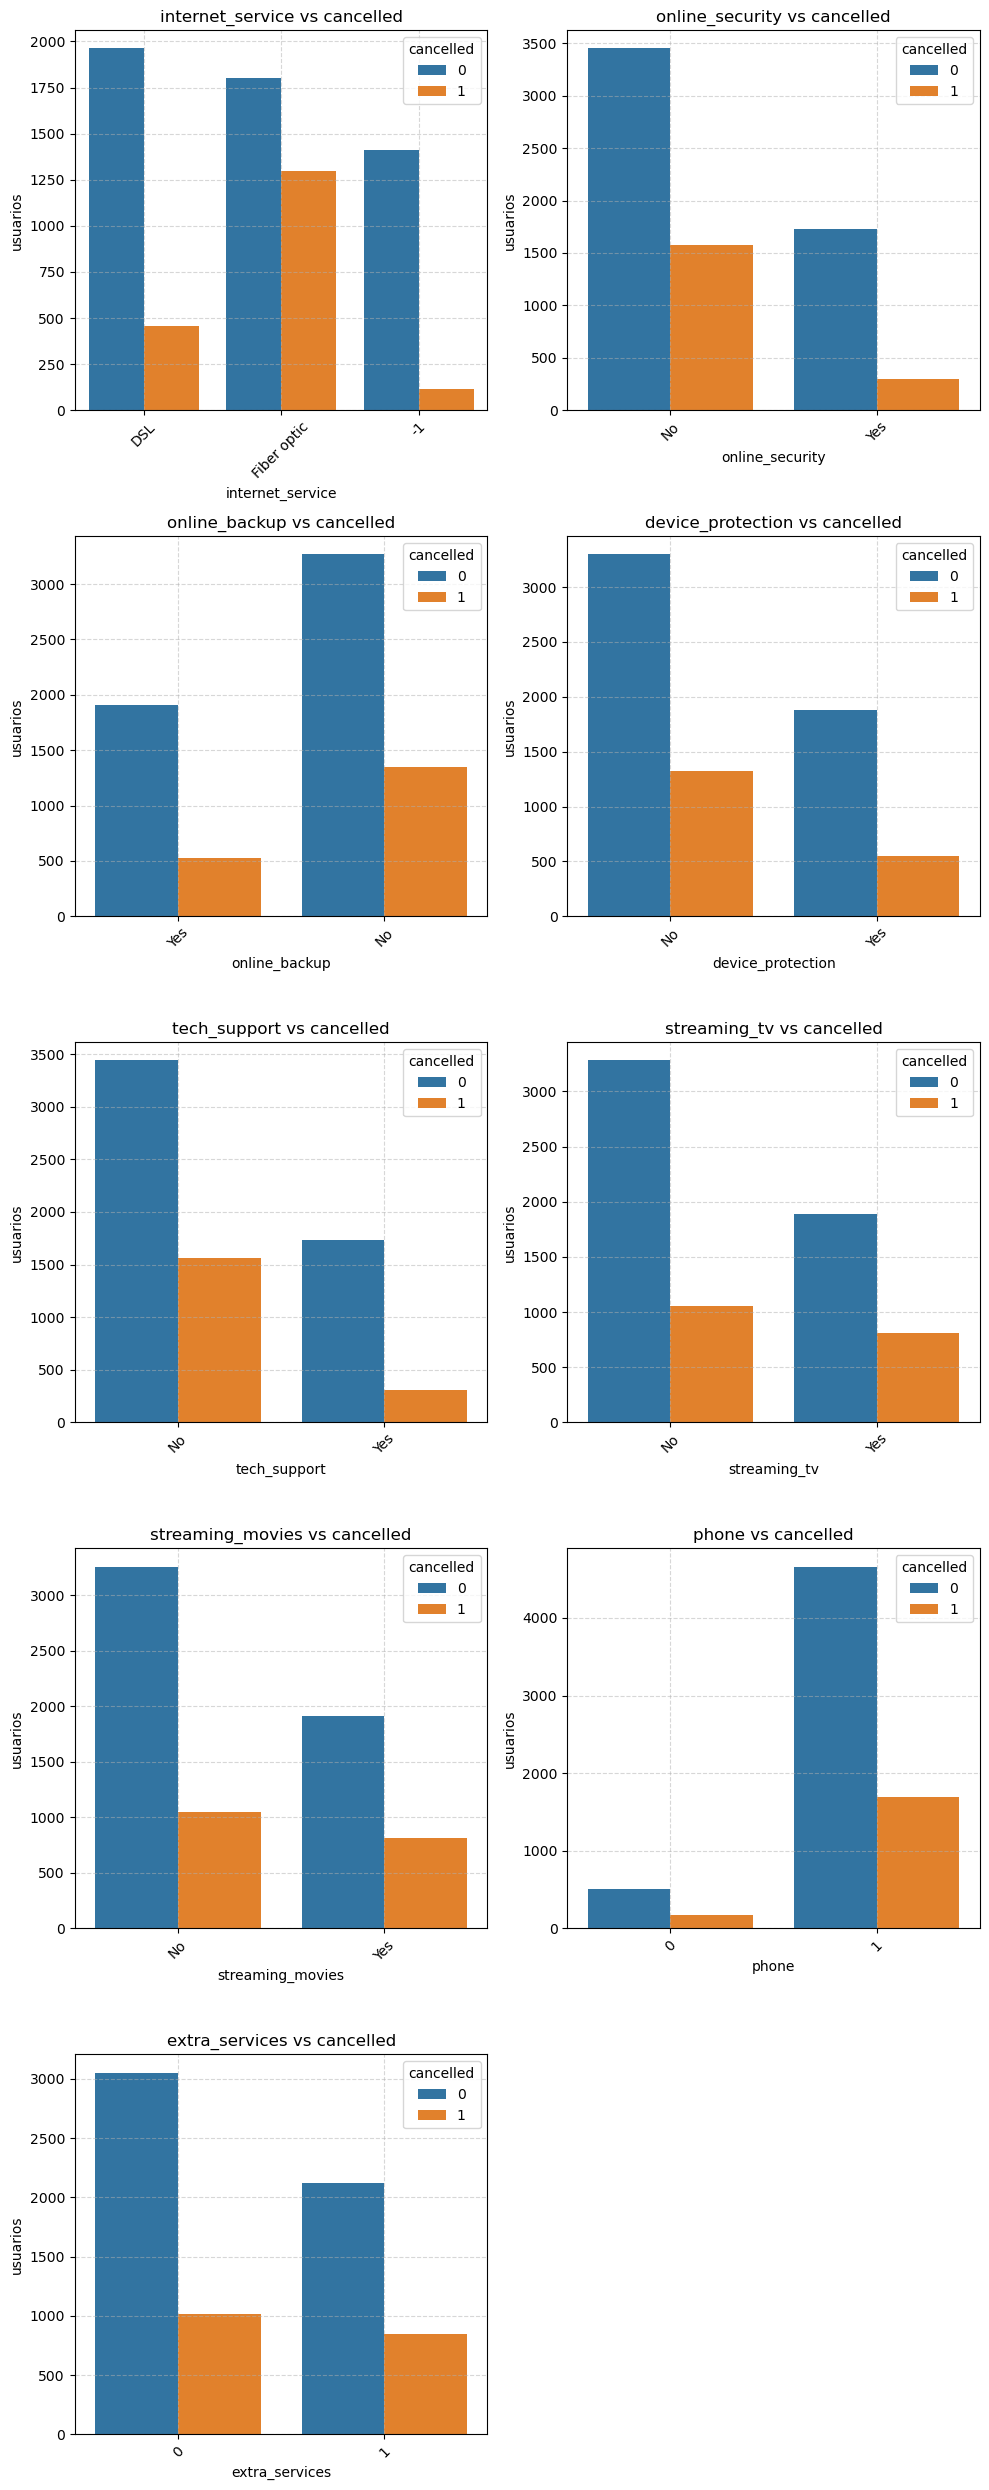

In [100]:
graph_cancelled_plot(df,internet_cols)

En las graficas anteriores se hacen notar  varios puntos de los usuarios que cancelan los cuales son :
* La mayor parte de los clientes que cancelaron tenian Fibra Optica en su servicio de internet. 
* La mayoria no contaba con servicio de seguridad online, respaldo online, proteccion de dispositivos, soporte tecnico, television y peliculas por streaming
* Por parte de la linea telefonica la mayoria si tenia contratado solo una linea telefonica, y la mayoria no tenia mas lineas. 

Tambien se puede decir que el mayor problema ha sido la implementacion de Fibra Optica con factor de cancelación. 

# 5. Entrenamiento de Modelos y Pruebas 

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   cancelled          7043 non-null   int64         
 9   gender             7043 non-null   object        
 10  senior_citizen     7043 non-null   int64         
 11  partner            7043 non-null   object        
 12  dependents         7043 non-null   object        
 13  internet_service   7043 non-null   object        
 14  online_s

In [102]:
df['senior_citizen'].value_counts()

0    5901
1    1142
Name: senior_citizen, dtype: int64

In [103]:
df['payment_method'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: payment_method, dtype: int64

Se cambia el tipo de dato de los meses de servicio que ha durado el cliente en la compañia para su manipulacion 

In [104]:
df['service_months']=df['service_months'].astype(float)

In [105]:
df['begin_date'].max()

Timestamp('2020-02-01 00:00:00')

Se recorre la columna cancelled al final 

In [106]:
df['cancelled'] = df.pop('cancelled')
df.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,streaming_movies,phone,extra_services,begin_month,begin_year,end_month,end_year,service_months,extra,cancelled
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,...,No,0,0,1,2020,2,2020,1.0,0.00,0
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,Male,0,...,No,1,0,4,2017,2,2020,34.0,-46.80,0
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,...,No,1,0,10,2019,12,2019,2.0,0.45,1
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,...,No,0,0,5,2016,2,2020,45.0,-62.75,0
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,...,No,1,0,9,2019,11,2019,2.0,10.25,1


C:\Users\Ricardo Peñaloza\AppData\Local\Temp\ipykernel_12924\1201578245.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corrwith(df['cancelled']).sort_values(ascending = False).to_frame()


Text(0.5, 1.0, 'Correlacion Con Cancelacion de Clientes')

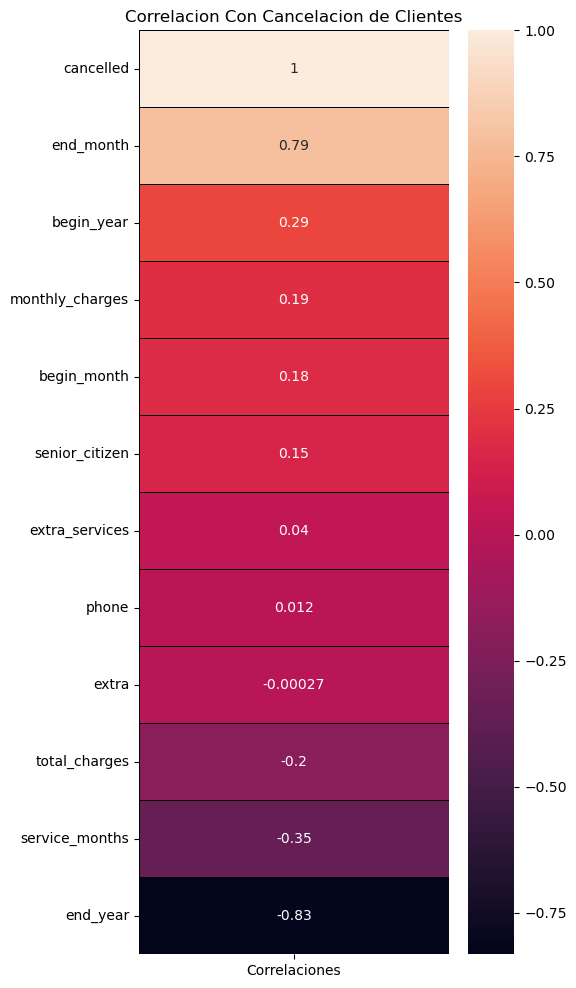

In [107]:
corr = df.corrwith(df['cancelled']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlaciones']
plt.subplots(figsize = (5,12))
sns.heatmap(corr,annot = True,linewidths = 0.4,linecolor = 'black')
plt.title('Correlacion Con Cancelacion de Clientes')

Podemos observar que logicamente hay columnas las cuales estan sumamente relacionadas con el abandono de los clientes como son: end_month, begin_year, y aunque end_year tiene una correlacion negativa, nos puede generar muchas complicaciones al momento de hacer el entrenamiento. Las columnas menos significativas son extra, phone y extra services.

C:\Users\Ricardo Peñaloza\AppData\Local\Temp\ipykernel_12924\3634054892.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".3f")


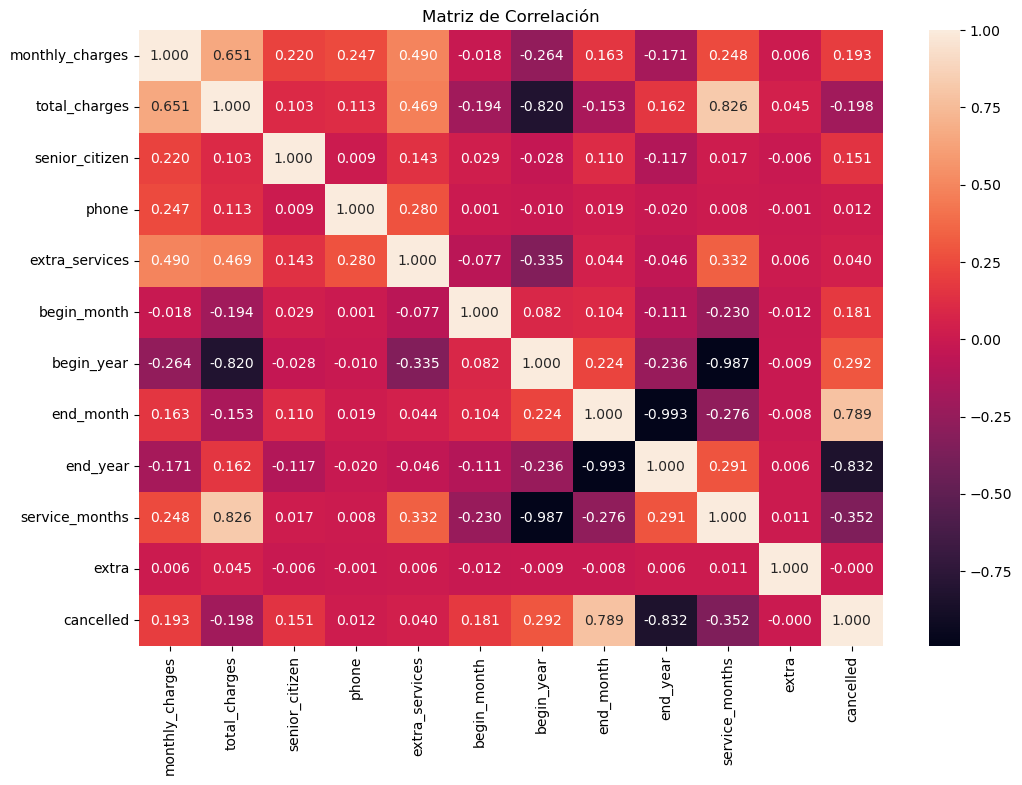

In [108]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".3f")
plt.title("Matriz de Correlación")
plt.show()

Podemos obaservar con mayor detalle las columnas las cuales no se relacionan directamente con Cancelled, posteriormente escogemos nuestros dataframes con la division  estratificada de nuestros datos. 

In [109]:
df_features=df.drop(['cancelled'],axis=1)
df_target=df['cancelled']

In [110]:
train_features, temp_features , train_target, temp_target= train_test_split(df_features,df_target, test_size=0.7, random_state=12345, stratify=df['cancelled'])
valid_features, test_features, valid_target, test_target = train_test_split(temp_features, temp_target, test_size=0.5, random_state=12345, stratify=temp_target)

Quitamos las columnas que nos puedan generar algun problema ya que las columnas de id, y fechas están totalmente relacionadas con el abandono de los clientes

In [111]:
col_no = ['customer_id','end_date','begin_date','begin_month', 'begin_year','end_month','end_year','service_months']
train_features = train_features.drop(columns=col_no )
valid_features = valid_features.drop(columns=col_no )
test_features = test_features.drop(columns=col_no )

In [112]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2112 entries, 6984 to 1127
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               2112 non-null   object 
 1   paperless_billing  2112 non-null   object 
 2   payment_method     2112 non-null   object 
 3   monthly_charges    2112 non-null   float64
 4   total_charges      2112 non-null   float64
 5   gender             2112 non-null   object 
 6   senior_citizen     2112 non-null   int64  
 7   partner            2112 non-null   object 
 8   dependents         2112 non-null   object 
 9   internet_service   2112 non-null   object 
 10  online_security    2112 non-null   object 
 11  online_backup      2112 non-null   object 
 12  device_protection  2112 non-null   object 
 13  tech_support       2112 non-null   object 
 14  streaming_tv       2112 non-null   object 
 15  streaming_movies   2112 non-null   object 
 16  phone              21

In [113]:
train_target

6984    0
6963    0
5952    0
3497    0
5867    0
       ..
3740    0
5422    0
6031    0
830     1
1127    0
Name: cancelled, Length: 2112, dtype: int64

In [114]:
train_features.select_dtypes(include=['object','int32','int64']).columns.tolist()

['type',
 'paperless_billing',
 'payment_method',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'phone',
 'extra_services']

Seleccionamos las columnas por medio de su tipo de dato, ya que las columnas como monthly charges no son variables categoricas. 

In [115]:

cat_cols = train_features.select_dtypes(include=['object','int32','int64']).columns.tolist()
cont_cols = train_features.select_dtypes(include=['float64']).columns.tolist()

In [116]:
cat_cols

['type',
 'paperless_billing',
 'payment_method',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'phone',
 'extra_services']

In [117]:
cont_cols

['monthly_charges', 'total_charges', 'extra']

Se codifican con OHE las columnas categoricas, y se estandarizan las columnas con variables continuas. 

In [118]:

train_features[cat_cols] = train_features[cat_cols].astype(str)
valid_features[cat_cols] = valid_features[cat_cols].astype(str)
test_features[cat_cols] = test_features[cat_cols].astype(str)

In [119]:
column_trans = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), cont_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_cols)
    ],
    remainder='passthrough'
)

In [120]:

features_train_tr = column_trans.fit_transform(train_features)
features_valid_tr = column_trans.transform(valid_features)
features_test_tr = column_trans.transform(test_features)

Se conservan los nombres originales y se asignan nuevos DataFrame para cada división

In [121]:
features_names_ohe = column_trans.named_transformers_['cat'].get_feature_names_out(cat_cols)
features_names_ohe


array(['type_One year', 'type_Two year', 'paperless_billing_Yes',
       'payment_method_Credit card (automatic)',
       'payment_method_Electronic check', 'payment_method_Mailed check',
       'gender_Male', 'senior_citizen_1', 'partner_Yes', 'dependents_Yes',
       'internet_service_DSL', 'internet_service_Fiber optic',
       'online_security_Yes', 'online_backup_Yes',
       'device_protection_Yes', 'tech_support_Yes', 'streaming_tv_Yes',
       'streaming_movies_Yes', 'phone_1', 'extra_services_1'],
      dtype=object)

In [122]:
features_names_n = cont_cols + list(features_names_ohe)
features_names_n

['monthly_charges',
 'total_charges',
 'extra',
 'type_One year',
 'type_Two year',
 'paperless_billing_Yes',
 'payment_method_Credit card (automatic)',
 'payment_method_Electronic check',
 'payment_method_Mailed check',
 'gender_Male',
 'senior_citizen_1',
 'partner_Yes',
 'dependents_Yes',
 'internet_service_DSL',
 'internet_service_Fiber optic',
 'online_security_Yes',
 'online_backup_Yes',
 'device_protection_Yes',
 'tech_support_Yes',
 'streaming_tv_Yes',
 'streaming_movies_Yes',
 'phone_1',
 'extra_services_1']

In [123]:
pd.DataFrame(features_train_tr, columns=features_names_n)

,monthly_charges,total_charges,extra,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,gender_Male,...,internet_service_DSL,internet_service_Fiber optic,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,phone_1,extra_services_1
0,-1.345392,-0.679239,0.219038,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.252632,-0.630966,-0.389247,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
2,-1.330326,-0.992758,-0.266369,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.137758,-0.961807,0.234303,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.534552,-0.653424,-0.061063,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107,0.216435,-0.969834,-0.112962,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2108,-0.084882,0.915751,1.766846,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
2109,-1.201429,-0.871931,0.067921,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2110,1.451836,1.464921,2.798718,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [124]:
features_train_ohe = pd.DataFrame(features_train_tr, columns=features_names_n)
features_valid_ohe = pd.DataFrame(features_valid_tr, columns=features_names_n)
features_test_ohe =pd.DataFrame(features_test_tr, columns=features_names_n)

In [125]:
print(features_train_ohe.head())


   monthly_charges  total_charges     extra  type_One year  type_Two year  \
0        -1.345392      -0.679239  0.219038            0.0            0.0   
1         1.252632      -0.630966 -0.389247            0.0            0.0   
2        -1.330326      -0.992758 -0.266369            0.0            0.0   
3         0.137758      -0.961807  0.234303            0.0            0.0   
4        -1.534552      -0.653424 -0.061063            0.0            1.0   

   paperless_billing_Yes  payment_method_Credit card (automatic)  \
0                    0.0                                     1.0   
1                    1.0                                     1.0   
2                    1.0                                     0.0   
3                    1.0                                     0.0   
4                    1.0                                     1.0   

   payment_method_Electronic check  payment_method_Mailed check  gender_Male  \
0                              0.0              

In [126]:
print(features_valid_ohe.head())

   monthly_charges  total_charges     extra  type_One year  type_Two year  \
0        -1.363806      -0.991691 -0.168677            0.0            0.0   
1        -0.352719      -1.005900  0.002284            0.0            0.0   
2         0.413966       1.448756  1.044841            0.0            1.0   
3        -1.526182      -0.706544  0.041972            1.0            0.0   
4         0.695195       1.705597 -0.554865            0.0            1.0   

   paperless_billing_Yes  payment_method_Credit card (automatic)  \
0                    1.0                                     0.0   
1                    1.0                                     0.0   
2                    0.0                                     1.0   
3                    0.0                                     0.0   
4                    0.0                                     0.0   

   payment_method_Electronic check  payment_method_Mailed check  gender_Male  \
0                              1.0              

# Resampleo y seleccion de caracteristicas 

Ya que anteriormente habiamos visto que los casos de cancelacion han sido menores a los que no han cancelado se hará un oversampling por medio de la tecnica de SMOTE para aumentar el numero de casos para equlibrar el modelo. 

In [127]:
#SMOTE
smote = SMOTE(random_state=12345)
feature_train_balanced, target_train_balanced = smote.fit_resample(features_train_ohe, train_target)
print(f'Clases después de SMOTE: \n {target_train_balanced.value_counts()}')


d:\anaconda\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Clases después de SMOTE: 
 0    1552
1    1552
Name: cancelled, dtype: int64


Se hace una reducción de dimensionalidad por medio de Boruta ya que nos ayuda a seleccionar las caracteristicas relevantes en el modelo.

In [128]:

rf_boruta = RandomForestClassifier(n_jobs=-1, max_depth=9, random_state=12345)
boruta_sel = BorutaPy(rf_boruta, n_estimators='auto', perc=100, random_state=12345)
#boruta fit
boruta_sel.fit(feature_train_balanced, target_train_balanced)
sel_features = features_train_ohe.columns[boruta_sel.support_].tolist()
print(f"Características seleccionadas por Boruta: {sel_features}")

Características seleccionadas por Boruta: ['monthly_charges', 'total_charges', 'extra', 'type_One year', 'type_Two year', 'paperless_billing_Yes', 'payment_method_Electronic check', 'dependents_Yes', 'internet_service_Fiber optic', 'online_security_Yes', 'tech_support_Yes']


Se asignan a cada conjunto las variables seleccionadas por boruta

In [129]:
features_train_red = feature_train_balanced[sel_features]
features_valid_red = features_valid_ohe[sel_features]
features_test_red = features_test_ohe[sel_features]

In [130]:
print('Dimensiones:')
print(f" valid_target: {valid_target.shape}")
print(f" test_target: {test_target.shape}")
print()
print("caracteristicas con balance:")
print(f" feature_train_balanced: {feature_train_balanced.shape}")
print(f" target_train_balanced: {target_train_balanced.shape}")
print()
print(" Dimensiones de caracteristicas con redimension:")
print(f" feature_train: {features_train_red.shape}")
print(f" feature_test: {features_test_red.shape}")
print(f" feature_valid: {features_valid_red.shape}")


Dimensiones:
 valid_target: (2465,)
 test_target: (2466,)

caracteristicas con balance:
 feature_train_balanced: (3104, 23)
 target_train_balanced: (3104,)

 Dimensiones de caracteristicas con redimension:
 feature_train: (3104, 11)
 feature_test: (2466, 11)
 feature_valid: (2465, 11)


# Cross Validation

Se hace la validacion crizada por medio de Stratified K-Fold dado que nuestro modelo ha habido un desbalance. para saber verificar que el modelo es estable con las variables seleccionadas.  

In [131]:
sk = StratifiedKFold(n_splits=5, shuffle=True, random_state=12345)
cv_scores = cross_val_score(rf_boruta, features_train_red, target_train_balanced, cv=sk, scoring='accuracy')
print(f"validación cruzada de las divisiones: {cv_scores}")
print(f"Promedio de validacion cruzada: {cv_scores.mean()}")

validación cruzada de las divisiones: [0.84219002 0.84863124 0.84702093 0.84219002 0.83548387]
Promedio de validacion cruzada: 0.843103215417381


In [132]:
print(f"Numero de caracteristicas seleccionadas: {features_train_red.shape[1]}")
print(features_train_red.sample(5))


Numero de caracteristicas seleccionadas: 11
      monthly_charges  total_charges     extra  type_One year  type_Two year  \
38           0.316874      -0.600504 -0.061826            1.0            0.0   
2640         0.796377      -0.990636  0.002284            0.0            0.0   
577          1.004882      -0.899970  0.112951            0.0            0.0   
3049         0.389051      -0.558621  0.236358            0.0            0.0   
2460         0.067388       0.227946  1.533561            0.0            0.0   

      paperless_billing_Yes  payment_method_Electronic check  dependents_Yes  \
38                      1.0                              0.0             0.0   
2640                    1.0                              1.0             0.0   
577                     1.0                              1.0             0.0   
3049                    1.0                              0.0             0.0   
2460                    1.0                              0.0             0.

In [133]:

print(f"Columnas: {sel_features}")

Columnas: ['monthly_charges', 'total_charges', 'extra', 'type_One year', 'type_Two year', 'paperless_billing_Yes', 'payment_method_Electronic check', 'dependents_Yes', 'internet_service_Fiber optic', 'online_security_Yes', 'tech_support_Yes']


Se observa la matriza de correlacion en el conjunto de entrenamiento

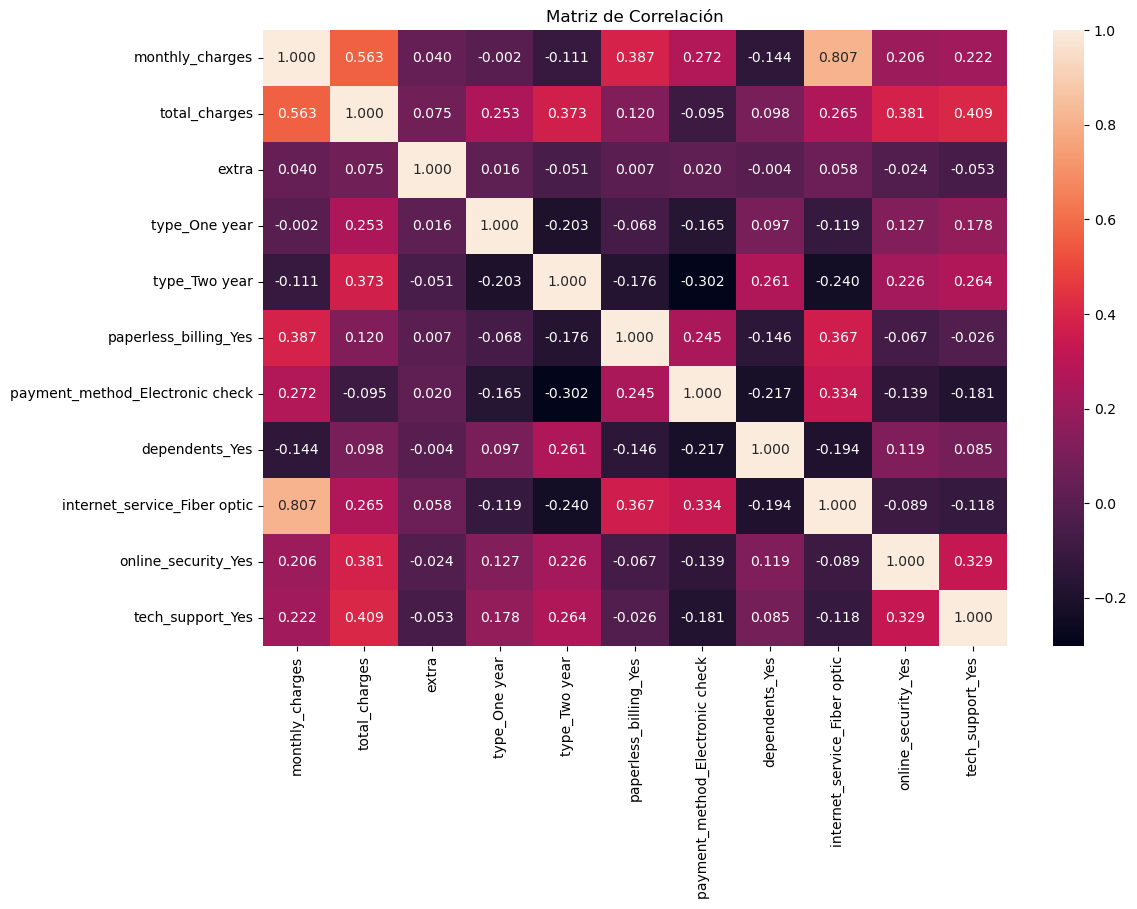

In [134]:
plt.figure(figsize=(12, 8))
sns.heatmap(features_train_red.corr(), annot=True, fmt=".3f")
plt.title("Matriz de Correlación")
plt.show()

Como anteriormente se mostró, se puede observar que efectivamente hay una gran influencia en los cargos mensuales,los meses de servicio brindado, y por ultimo hay mucha relacion con el servicio de fibra óptica.  

Se hace un diccionario con modelos a probar para poder iterar y ver los mejores resultados. 

In [135]:
# Definir modelos
models = {
            "Logistic Regression": LogisticRegression(max_iter=500, random_state=12345),
            "DecisionTree": DecisionTreeClassifier(random_state=12345),
            "Random Forest": RandomForestClassifier(n_estimators=100, random_state=12345),
            "LightGBM": LGBMClassifier(random_state=12345),
            "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=12345),
            "AdaBoost" :AdaBoostClassifier(random_state=12345),
            "GradientBoosting" : GradientBoostingClassifier(random_state=12345)
}

In [136]:
results_train = {}
results_test = {}
results_valid = {}

for name, model in models.items():
    model.fit(features_train_red, target_train_balanced)
    
    y_pred_train = model.predict(features_train_red)
    y_prob_train = model.predict_proba(features_train_red)[:, 1]
    
    y_pred_test = model.predict(features_test_red)
    y_prob_test = model.predict_proba(features_test_red)[:, 1]

    y_pred_valid = model.predict(features_valid_red)
    y_prob_valid = model.predict_proba(features_valid_red)[:, 1]

    acc_train = accuracy_score(target_train_balanced, y_pred_train)
    auc_train = roc_auc_score(target_train_balanced, y_prob_train)
   
    
    acc_test = accuracy_score(test_target, y_pred_test)
    auc_test = roc_auc_score(test_target, y_prob_test)


    acc_valid = accuracy_score(valid_target, y_pred_valid)
    auc_valid = roc_auc_score(valid_target, y_prob_valid)
   
    
    
    results_train[name] = {'Accuracy': acc_train, 'AUC-ROC': auc_train}
    results_test[name] = {'Accuracy': acc_test, 'AUC-ROC': auc_test}
    results_valid[name] = {'Accuracy': acc_valid, 'AUC-ROC': auc_valid}

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1552, number of negative: 1552
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1009
[LightGBM] [Info] Number of data points in the train set: 3104, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


d:\anaconda\lib\site-packages\xgboost\core.py:158: UserWarning: [09:49:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [137]:
results_train_df = pd.DataFrame(results_train).T
results_test_df = pd.DataFrame(results_test).T
results_valid_df = pd.DataFrame(results_valid).T


print("Resultados Train", results_train_df.sort_values(by='AUC-ROC', ascending=False))
print("Resultados Test", results_test_df.sort_values(by='AUC-ROC', ascending=False))
print("Resultados Valid",results_valid_df.sort_values(by='AUC-ROC', ascending=False))

Resultados Train                      Accuracy   AUC-ROC
DecisionTree         0.999034  0.999998
Random Forest        0.999034  0.999990
XGBoost              0.972616  0.996504
LightGBM             0.952320  0.990107
GradientBoosting     0.865979  0.943441
AdaBoost             0.801546  0.886598
Logistic Regression  0.766108  0.850358
Resultados Test                      Accuracy   AUC-ROC
AdaBoost             0.753852  0.838455
GradientBoosting     0.778994  0.834117
Logistic Regression  0.741281  0.830066
LightGBM             0.771695  0.815190
Random Forest        0.775345  0.809632
XGBoost              0.770073  0.803644
DecisionTree         0.718167  0.678392
Resultados Valid                      Accuracy   AUC-ROC
AdaBoost             0.762677  0.830478
GradientBoosting     0.778905  0.829501
Logistic Regression  0.752130  0.826548
LightGBM             0.780122  0.818525
Random Forest        0.782150  0.816569
XGBoost              0.775659  0.813800
DecisionTree         0.723732 

Con ayuda de GridSearch vamos a buscar los mejores hiperparametros para poder mejorar un poco el modelo. Esto solo lo haremos en AdaBoost y GradientBoosting ya que son los modelos con mayor puntuacion en AUC ROC.

# GradientBoosting Classifier con Gridsearch 

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mejor modelo Gradient Boosting:
GradientBoostingClassifier(max_depth=5)
Mejores hiperparámetros:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Mejor puntuación AUC-ROC:
0.9178470343392299
Puntuación AUC-ROC:
0.8226874781340494


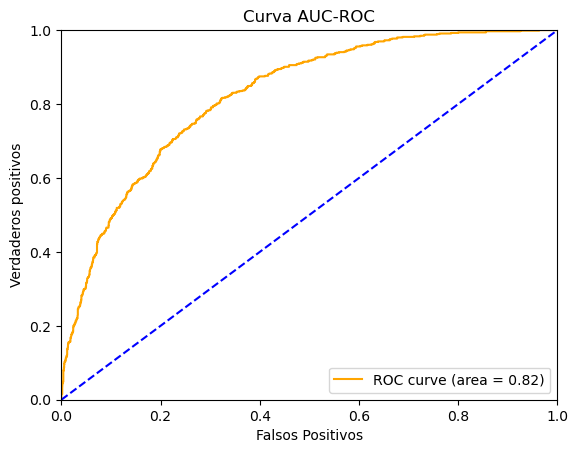

In [138]:

gb_model = GradientBoostingClassifier()

gb_param_grid = {
    'n_estimators': [100,200,300],
    'learning_rate': [0.01, 0.1,1],
    'max_depth': [1, 5, 10]
}

gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=sk, scoring='roc_auc', n_jobs=-1, verbose=1)
gb_grid_search.fit(features_train_red, target_train_balanced)

print("Mejor modelo Gradient Boosting:")
print(gb_grid_search.best_estimator_)

print("Mejores hiperparámetros:")
print(gb_grid_search.best_params_)

print("Mejor puntuación AUC-ROC:")
print(gb_grid_search.best_score_)

best_gb = gb_grid_search.best_estimator_
best_gb.fit(features_train_red, target_train_balanced)

y_pred = best_gb.predict(features_test_red)
y_pred_proba = best_gb.predict_proba(features_test_red)[:, 1]

print("Puntuación AUC-ROC:")
print(roc_auc_score(test_target, y_pred_proba))

fpr, tpr, _ = roc_curve(test_target, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos positivos')
plt.title('Curva AUC-ROC')
plt.legend(loc="lower right")
plt.show()

# AdaBoost con GridSearch

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejor modelo Gradient Boosting:
AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1, n_estimators=600, random_state=54321)
Mejores hiperparámetros:
{'learning_rate': 1, 'n_estimators': 600}
Mejor puntuación AUC-ROC:
0.9006092160162746
AUC-ROC:
0.8373413533073962


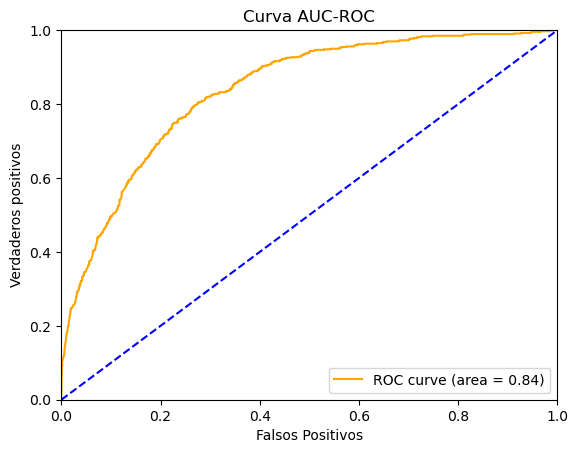

In [139]:

dtc=DecisionTreeClassifier(max_depth=1)
ada_model = AdaBoostClassifier(estimator=dtc,random_state=54321)

#hallo hiperparametros
ada_param_grid = {
    'n_estimators': [200,300,600],
    'learning_rate': [0.01, 0.1, 1,10],
    
}

ada_grid_search = GridSearchCV(estimator=ada_model, param_grid=ada_param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
ada_grid_search.fit(features_train_red, target_train_balanced)

print("Mejor modelo Gradient Boosting:")
print(ada_grid_search.best_estimator_)

print("Mejores hiperparámetros:")
print(ada_grid_search.best_params_)

print("Mejor puntuación AUC-ROC:")
print(ada_grid_search.best_score_)

best_ada = ada_grid_search.best_estimator_
best_ada.fit(features_train_red, target_train_balanced)

y_pred = best_ada.predict(features_test_red)
y_pred_proba = best_ada.predict_proba(features_test_red)[:, 1]

print("AUC-ROC:")
print(roc_auc_score(test_target, y_pred_proba))

fpr, tpr, _ = roc_curve(test_target, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos positivos')
plt.title('Curva AUC-ROC')
plt.legend(loc="lower right")
plt.show()

Podemos observar que nuestro modelo, tiene mejor rendimiento en Adaboost ya que en GradientBoosting tiene un valor AUC ROC menor y por lo tanto menos confiable, se comparará con LightGBM para tener un panorama de las diferencias.  

# LightGBM

In [140]:
LGBM = LGBMClassifier(random_state=54321,class_weight='balanced')

param_grid_lgbm = {
    'n_estimators': [150, 300,600],
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'max_depth': [4, 10,15],
    'min_child_samples': [10, 20, 30]}

grid_search_lgbm = GridSearchCV(
    estimator=LGBM,
    param_grid=param_grid_lgbm,
    scoring='roc_auc',
    cv=10,
    n_jobs=-1,
    verbose=0
)

grid_search_lgbm.fit(features_train_red, target_train_balanced)

lgbm_best_params_=grid_search_lgbm.best_params_
print("Mejores parámetros:", lgbm_best_params_)
print(" AUC-ROC :", grid_search_lgbm.best_score_)
lgbm_est = grid_search_lgbm.best_estimator_
print(lgbm_est)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1552, number of negative: 1552
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1009
[LightGBM] [Info] Number of data points in the train set: 3104, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Mejores parámetros: {'learning_rate': 0.01, 'max_depth': 15, 'min_child_samples': 10, 'n_estimators': 600}
 AUC-ROC : 0.924825328850823
LGBMClassifier(class_weight='balanced', learning_rate=0.01, max_depth=15,
               min_child_samples=10, n_estimators=600, random_state=54321)


In [141]:
#train
y_pred_train_lgbm = lgbm_est.predict(features_train_red)
y_proba_train_lgbm = lgbm_est.predict_proba(features_train_red)[:, 1]

#test
y_pred_test_lgbm = lgbm_est.predict(features_test_red)
y_proba_test_lgbm= lgbm_est.predict_proba(features_test_red)[:, 1]

In [142]:
lgbm_grid=[{'AUC_ROC':roc_auc_score(target_train_balanced, y_proba_train_lgbm),'Accuracy':accuracy_score(target_train_balanced, y_pred_train_lgbm),'F1-score':f1_score(target_train_balanced, y_pred_train_lgbm),'Recall':recall_score(target_train_balanced, y_pred_train_lgbm)}]
lgbm_grid=pd.DataFrame(lgbm_grid)
lgbm_grid=pd.concat( [lgbm_grid, pd.DataFrame([{'AUC_ROC':roc_auc_score(test_target, y_proba_test_lgbm),'Accuracy':accuracy_score(test_target, y_pred_test_lgbm),'F1-score':f1_score(test_target, y_pred_test_lgbm),'Recall':recall_score(test_target, y_pred_test_lgbm)}])],ignore_index=True)

In [143]:
lgbm_grid

,AUC_ROC,Accuracy,F1-score,Recall
0,0.980406,0.925902,0.927353,0.945876
1,0.823640,0.775345,0.582202,0.589313


Se puede observar que en general se tiende a bajar demasiado en el conjunto de prueba y validacion , esto proviene por el desbalance de clases, sin embargo llega a ser mayor a .80 en LightGBM, Adaboost en este caso es de mejor rendimiento. 

# Adaboost con hiperparametros y caracteristicas mas importantes a considerar.  

AUC-ROC score:
0.8373413533073962


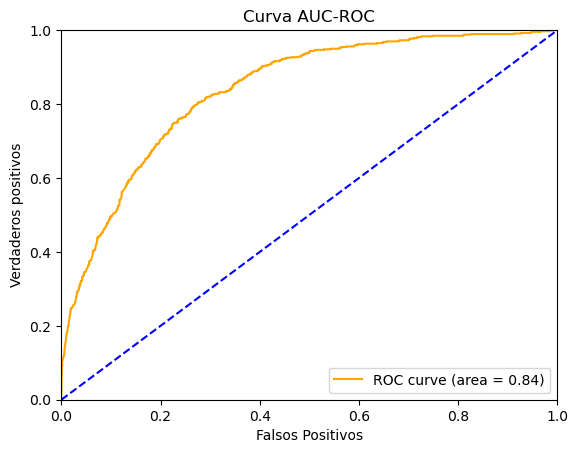

In [144]:
dtc=DecisionTreeClassifier(max_depth=1)
ada_model = AdaBoostClassifier(estimator=dtc,
                               learning_rate=1,
                               n_estimators=600,
                               random_state=54321)

ada_model.fit(features_train_red, target_train_balanced)

y_pred = ada_model.predict(features_test_red)
y_pred_proba = ada_model.predict_proba(features_test_red)[:, 1]


print("AUC-ROC score:")
print(roc_auc_score(test_target, y_pred_proba))

fpr, tpr, _ = roc_curve(test_target, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos positivos')
plt.title('Curva AUC-ROC')
plt.legend(loc="lower right")
plt.show()


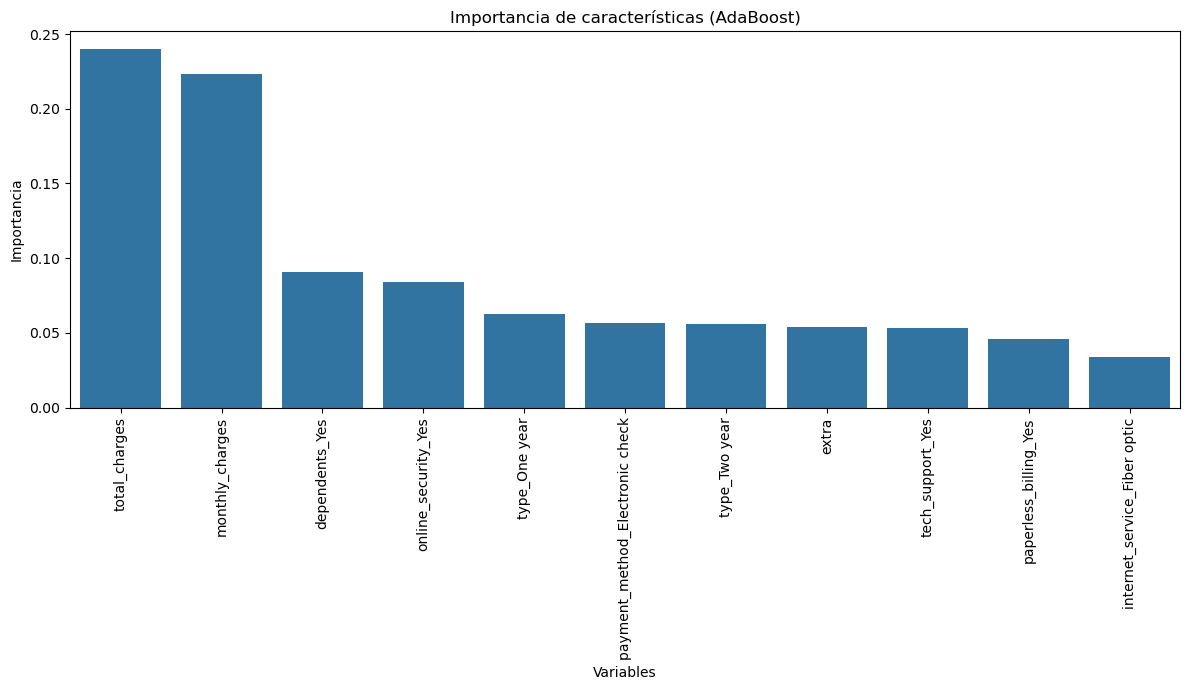

In [145]:
importances = ada_model.feature_importances_
features = features_test_red.columns

# Crear DataFrame ordenado
feat_imp = pd.DataFrame({'Variables': features, 'Importancia': importances})
print()
feat_imp = feat_imp.sort_values(by='Importancia', ascending=False)

# Visualización
plt.figure(figsize=(12, 7))
sns.barplot(data=feat_imp.head(15), x='Variables', y='Importancia')
plt.title('Importancia de características (AdaBoost)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 6. Conclusiones

A pesar que varios modelos de clasificacion son en la mayoria acertados, podemos concluir y tener la confianza que para este caso con Adaboost se podra trabajar de manera acertada con el AUC-ROC dentro de un margen aceptable de 0.84~. Por otra parte hay variables que influyen mucho en la cancelacion del cliente principalmente los cargos que se hacen de manera mensual, por lo tanto afecta el total, por las variables que se muestran se puede deducir que tambien una de las razones principales es el servicio de internet por fibra óptica, ya que esto puede afectar la calidad del servicio, es recomendable que a los nuevos usuarios se les pueda dar la atencion en este servicio.  